In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as st 
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt 
import math
import seaborn as seabornInstance 
import statistics as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split   

In [2]:
data=pd.read_csv('AR_3_U.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
x=data.iloc[:,2]
z=data.iloc[:,3]

print(stats.stdev(y))
print(data)

0.06641531883171181
           A          B         C        D
0   0.004610   0.382610  45.32733  0.31478
1   0.203476  17.260518  44.51848  0.07224
2   0.000411   0.078306  44.32612  0.01430
3   0.000900   0.925239  44.69770  0.00526
4   0.000850   0.271260  44.30242  0.01505
..       ...        ...       ...      ...
65  0.004601  10.141590  44.54921  0.06313
66  0.010902   1.641935  44.65970  0.01427
67  0.010370  13.263489  44.79900  0.00287
68  0.031702  14.147771  44.18964  0.16066
69  0.008109   8.432085  44.25669  0.01856

[69 rows x 4 columns]


In [3]:
data.describe()

,A,B,C,D
count,69.000000,69.000000,69.000000,69.000000
mean,0.039943,9.973450,44.587234,0.053226
std,0.066415,7.052965,0.321449,0.057855
min,0.000403,0.078306,44.084260,0.001460
25%,0.004394,2.921464,44.326120,0.013930
50%,0.010725,10.278783,44.549210,0.031930
75%,0.040563,14.613720,44.784820,0.066890
max,0.296954,29.757303,45.679790,0.314780


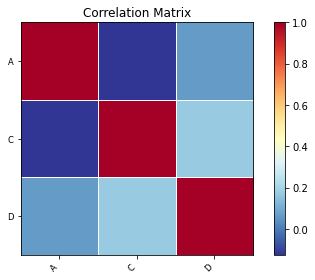

In [4]:
corr = data.set_index('B').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  -0.025965957909676447
intercepción b0 is 1.1976930085423847


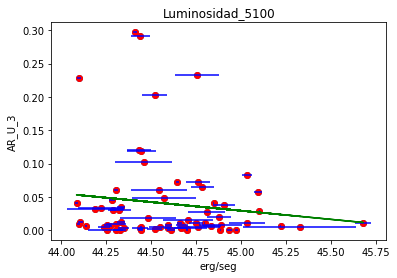

In [5]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('AR_U_3')
plt.savefig("Luminosidad_5100_AR_U_3.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'erg/seg')

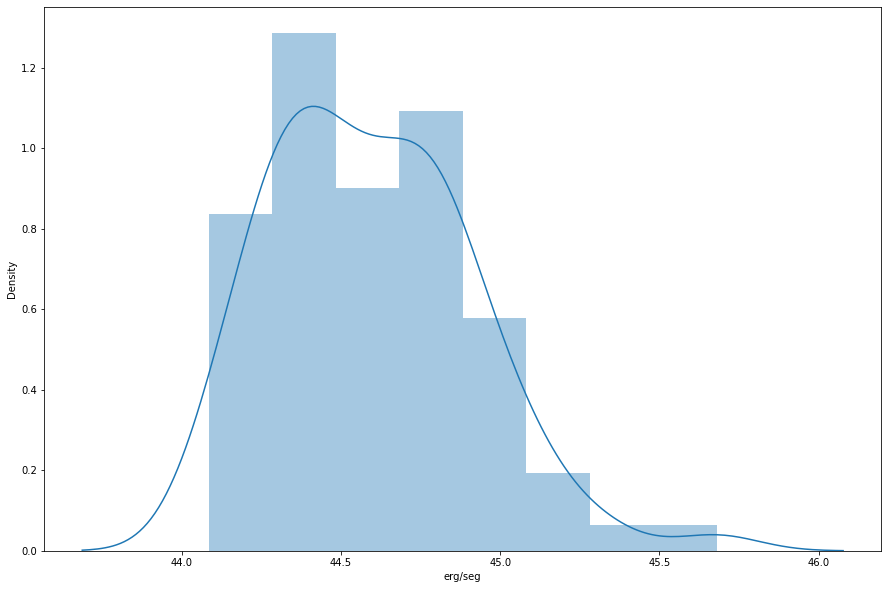

In [9]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['C'])
plt.xlabel('erg/seg')

In [10]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)


Pendiente : [[-0.26831446]
 [ 1.44994107]
 [ 1.        ]]
Intercepción: [ 1.26530574e+01 -4.96898987e+01  1.42108547e-14]
Errorcuadratico medio : 53.87220576325699
Raiz del error cuadratico medio:  7.33976878132118
 Coeficiente de determinacion R2 :  0.3358401778477891


In [11]:
data=pd.read_csv('AR_3_G.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
x=data.iloc[:,2]
z=data.iloc[:,3]

print(stats.stdev(y))
print(data)

1.0756176243384126
           A          B         C        D
0   2.268173  26.987343  45.32733  0.31478
1   1.881388  22.662185  44.51848  0.07224
2   0.008513   0.198709  44.32612  0.01430
3   0.002794   1.804318  44.69770  0.00526
5   0.005664   0.140694  44.83574  0.05485
..       ...        ...       ...      ...
74  1.067034  35.632593  44.78145  0.09942
75  0.062178   2.779789  44.77507  0.07369
76  0.001467   2.946952  44.36424  0.00708
77  0.015819   5.823269  44.17580  0.04911
78  0.006064   6.899561  44.40151  0.00523

[78 rows x 4 columns]


In [12]:
data.describe()

,A,B,C,D
count,78.000000,78.000000,78.000000,78.000000
mean,0.687486,14.970698,44.595327,0.055201
std,1.075618,12.758378,0.316362,0.058273
min,0.000864,0.140694,44.084260,0.001460
25%,0.008081,3.055706,44.335055,0.014015
50%,0.058477,11.793854,44.565380,0.034470
75%,0.908272,24.639265,44.795455,0.073327
max,4.246745,50.665967,45.679790,0.314780


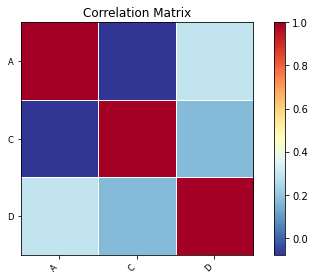

In [13]:
corr = data.set_index('B').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  -0.268314459302911
intercepción b0 is 12.653057447979956


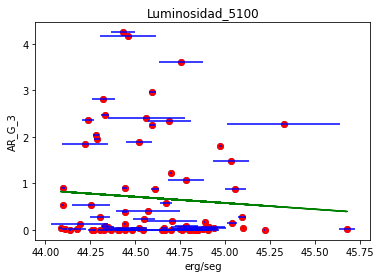

In [14]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('AR_G_3')
plt.savefig("Luminosidad_5100_AR_G_3.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'erg/seg')

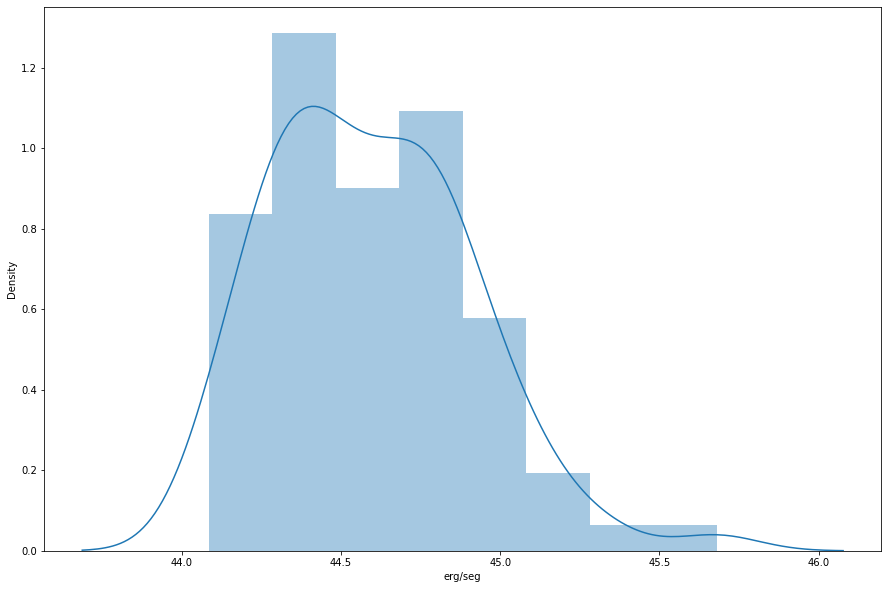

In [16]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['C'])
plt.xlabel('erg/seg')

In [17]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-0.26831446]
 [ 1.44994107]
 [ 1.        ]]
Intercepción: [ 1.26530574e+01 -4.96898987e+01  1.42108547e-14]
Errorcuadratico medio : 53.87220576325699
Raiz del error cuadratico medio:  7.33976878132118
 Coeficiente de determinacion R2 :  0.3358401778477891


In [18]:
data=pd.read_csv('AR_3_R.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
x=data.iloc[:,2]
z=data.iloc[:,3]

print(stats.stdev(y))
print(data)

0.6781789593003302
           A          B         C        D
0   0.029827   7.135142  45.32733  0.31478
1   0.939109  41.613969  44.51848  0.07224
2   0.000273   0.074863  44.32612  0.01430
3   0.000987   1.417666  44.69770  0.00526
4   0.008918   6.588590  44.30242  0.01505
..       ...        ...       ...      ...
77  0.827421  40.138934  44.17580  0.04911
78  0.016002   0.487726  44.40151  0.00523
79  0.002104   3.571975  44.20654  0.02390
80  0.450523  21.498476  44.59746  0.00671
81  0.079751  24.066982  44.17015  0.06091

[81 rows x 4 columns]


In [19]:
data.describe()

,A,B,C,D
count,81.000000,81.000000,81.000000,81.000000
mean,0.322831,10.511121,44.579349,0.053667
std,0.678179,10.924598,0.317563,0.057680
min,0.000273,0.001866,44.084260,0.001460
25%,0.002777,1.017196,44.326120,0.013930
50%,0.018754,6.588590,44.549210,0.032770
75%,0.242752,18.834020,44.781450,0.072240
max,3.549631,41.613969,45.679790,0.314780


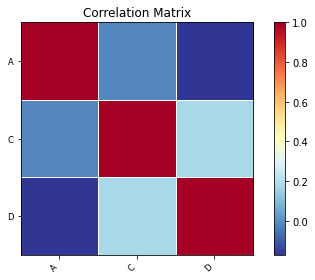

In [20]:
corr = data.set_index('B').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  -0.0282620639095894
intercepción b0 is 1.5827349178353713


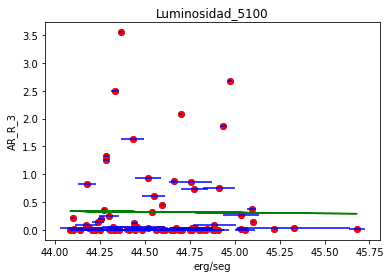

In [21]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('AR_R_3')
plt.savefig("Luminosidad_5100_AR_R_3.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'erg/seg')

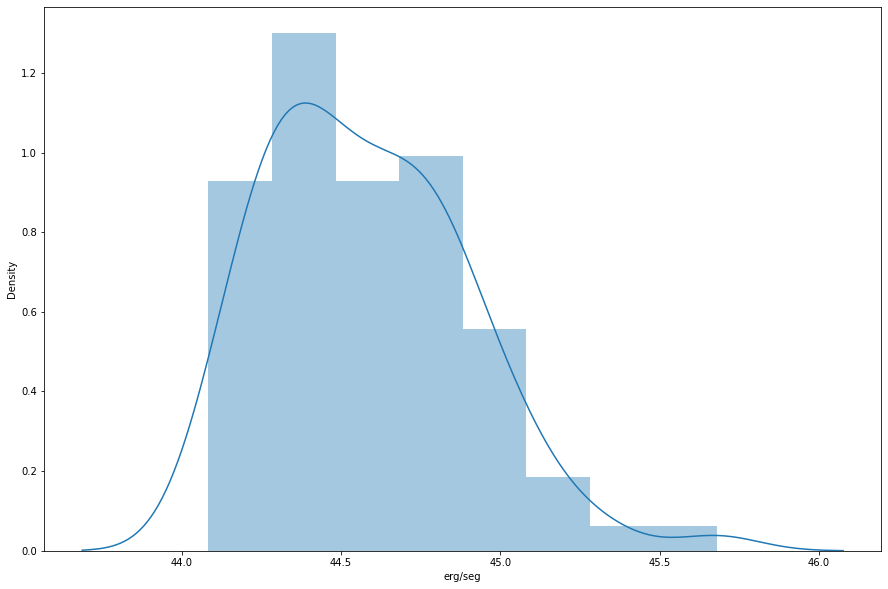

In [22]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['C'])
plt.xlabel('erg/seg')

In [23]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-0.02826206]
 [-1.52741115]
 [ 1.        ]]
Intercepción: [ 1.58273492 78.60211609  0.        ]
Errorcuadratico medio : 39.365077239874125
Raiz del error cuadratico medio:  6.2741594847337225
 Coeficiente de determinacion R2 :  0.33404882305527944


In [24]:
data=pd.read_csv('AR_3_I.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
x=data.iloc[:,2]
z=data.iloc[:,3]

print(stats.stdev(y))
print(data)

1.0625699184601847
           A          B         C        D
0   3.537637  22.423751  45.32733  0.31478
1   1.243946  30.500291  44.51848  0.07224
2   0.001194   0.242765  44.32612  0.01430
3   0.009987   1.945550  44.69770  0.00526
4   0.054723  16.167326  44.30242  0.01505
..       ...        ...       ...      ...
80  0.004317   0.918915  44.59746  0.00671
81  0.552362  26.111676  44.17015  0.06091
82  0.018076   1.883630  44.31297  0.01773
83  0.002377   2.614546  44.52867  0.01500
84  0.002957   3.476811  44.68251  0.01940

[84 rows x 4 columns]


In [25]:
data.describe()

,A,B,C,D
count,84.000000,84.000000,84.000000,84.000000
mean,0.448377,12.764901,44.577823,0.053062
std,1.062570,10.704757,0.313924,0.056830
min,0.000518,0.042011,44.084260,0.001460
25%,0.004827,3.072807,44.325268,0.014292
50%,0.028330,9.260577,44.545520,0.032350
75%,0.176161,20.090326,44.782292,0.068227
max,5.427351,40.817050,45.679790,0.314780


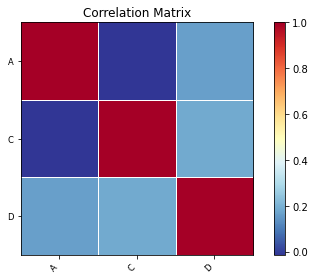

In [26]:
corr = data.set_index('B').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  -0.04715384530158333
intercepción b0 is 2.5503922925431652


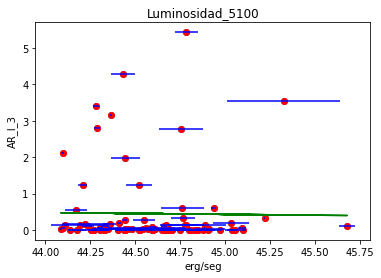

In [27]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('AR_I_3')
plt.savefig("Luminosidad_5100_AR_I_3.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'erg/seg')

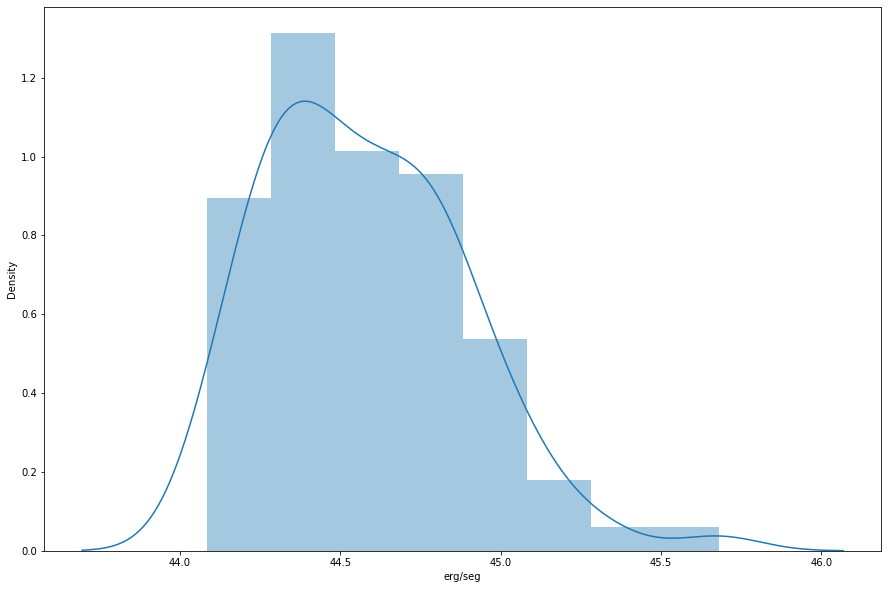

In [29]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['C'])
plt.xlabel('erg/seg')

In [30]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-0.04715385]
 [ 0.61518008]
 [ 1.        ]]
Intercepción: [ 2.55039229e+00 -1.46584879e+01 -7.10542736e-15]
Errorcuadratico medio : 38.10205835279347
Raiz del error cuadratico medio:  6.172686477765858
 Coeficiente de determinacion R2 :  0.3335065123081206


In [31]:
data=pd.read_csv('AR_3_Z.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
x=data.iloc[:,2]
z=data.iloc[:,3]

print(stats.stdev(y))
print(data)

0.06836162210600644
           A          B  Unnamed: 2  Unnamed: 3
0   0.015796  16.856544    45.32733     0.31478
1   0.004108   6.532813    44.51848     0.07224
2   0.001945   8.399408    44.32612     0.01430
3   0.016365   2.586329    44.69770     0.00526
4   0.044795  14.814978    44.30242     0.01505
..       ...        ...         ...         ...
73  0.001407   7.387118    44.56043     0.21451
74  0.000691   0.497308    44.78145     0.09942
75  0.001740   6.482151    44.77507     0.07369
76  0.009758  17.643612    44.36424     0.00708
77  0.081303  19.322293    44.17580     0.04911

[78 rows x 4 columns]


In [32]:
data.describe()

,A,B,Unnamed: 2,Unnamed: 3
count,78.000000,78.000000,78.000000,78.000000
mean,0.032250,12.058123,44.594057,0.055327
std,0.068362,8.491412,0.317348,0.058174
min,0.000682,0.497308,44.084260,0.001460
25%,0.003206,6.494816,44.331250,0.014278
50%,0.009019,11.086644,44.565380,0.034470
75%,0.023480,15.622306,44.795455,0.073327
max,0.459346,39.792020,45.679790,0.314780


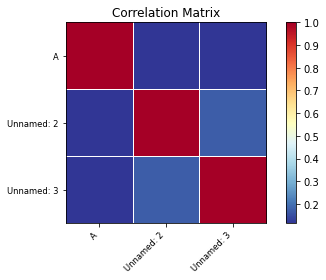

In [34]:
corr = data.set_index('B').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  0.02495648942946165
intercepción b0 is -1.0806611792170742


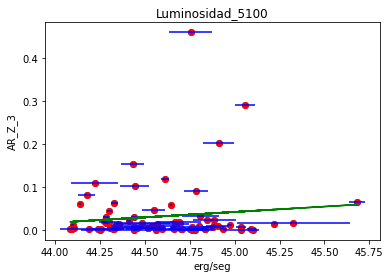

In [35]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('AR_Z_3')
plt.savefig("Luminosidad_5100_AR_Z_3.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'erg/seg')

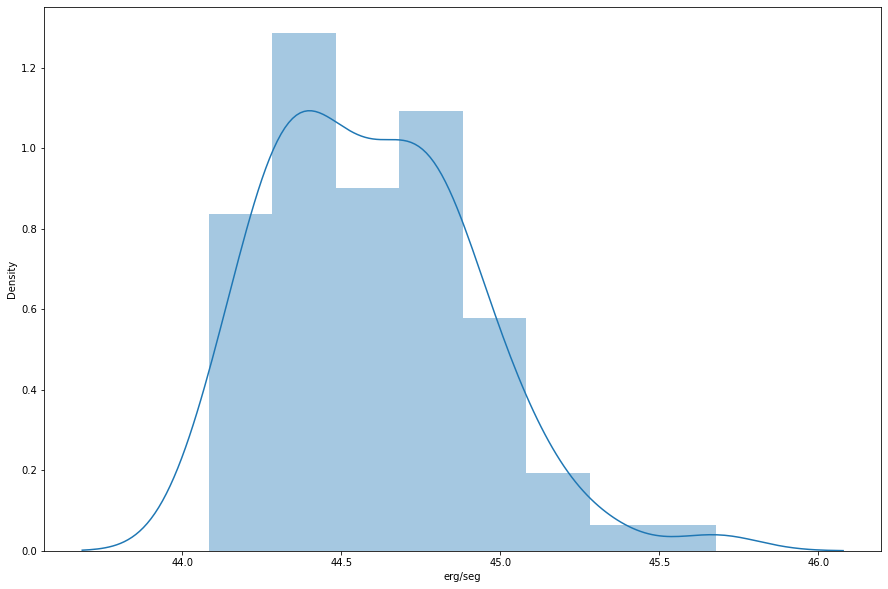

In [38]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['Unnamed: 2'])
plt.xlabel('erg/seg')

In [39]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[0.02495649]
 [4.50380453]
 [1.        ]]
Intercepción: [  -1.08066118 -188.78479293    0.        ]
Errorcuadratico medio : 23.055864819841428
Raiz del error cuadratico medio:  4.801652301014873
 Coeficiente de determinacion R2 :  0.34725114193504997
